In [14]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [15]:
non_churned_data = pd.read_csv("non_churned_customers.csv")
non_churned_data_backup = non_churned_data

In [16]:
non_churned_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,7,0,20,1,2000,32,35,16,3,1,1,30,221.280,0
2651,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
2652,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
2653,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0


In [17]:
# Droping the 'Churn' column from the DataFrame
non_churned_data = non_churned_data.drop(columns=['Churn'])

non_churned_data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805


In [18]:
non_churned_data = non_churned_data.drop(['Age Group', 'Tariff Plan', 'Status', 'Age'], axis=1)
non_churned_data['Average of use'] = (non_churned_data['Seconds of Use']/60)/non_churned_data['Frequency of use']
non_churned_data.drop(['Frequency of use','Seconds of Use'],axis=1,inplace=True)
non_churned_data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Distinct Called Numbers,Customer Value,Average of use
0,8,0,38,0,5,17,197.640,1.025822
1,0,0,39,0,7,4,46.035,1.060000
2,10,0,37,0,359,24,1536.520,0.681389
3,10,0,38,0,1,35,240.020,1.060101
4,3,0,38,0,2,33,145.805,0.687644


In [20]:
non_churned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2655 non-null   int64  
 1   Complains                2655 non-null   int64  
 2   Subscription  Length     2655 non-null   int64  
 3   Charge  Amount           2655 non-null   int64  
 4   Frequency of SMS         2655 non-null   int64  
 5   Distinct Called Numbers  2655 non-null   int64  
 6   Customer Value           2655 non-null   float64
 7   Average of use           2582 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 166.1 KB


In [21]:
non_churned_data['Average of use'] = non_churned_data['Average of use'].fillna(0)

In [22]:
non_churned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2655 non-null   int64  
 1   Complains                2655 non-null   int64  
 2   Subscription  Length     2655 non-null   int64  
 3   Charge  Amount           2655 non-null   int64  
 4   Frequency of SMS         2655 non-null   int64  
 5   Distinct Called Numbers  2655 non-null   int64  
 6   Customer Value           2655 non-null   float64
 7   Average of use           2655 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 166.1 KB


In [23]:
#Scaling
scaler = StandardScaler()
scaler.fit(non_churned_data)
scaled_non_churned_data = pd.DataFrame(scaler.transform(non_churned_data),columns= non_churned_data.columns )
print("All features are now scaled")

All features are now scaled


In [24]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_non_churned_data.head()

Dataframe to be used for further modelling:


,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Distinct Called Numbers,Customer Value,Average of use
0,0.048075,-0.125239,0.636112,-0.672169,-0.663979,-0.493652,-0.630224,-0.060446
1,-1.070341,-0.125239,0.755291,-0.672169,-0.647142,-1.241377,-0.913009,0.007013
2,0.327679,-0.125239,0.516934,-0.672169,2.316165,-0.091031,1.867157,-0.740260
3,0.327679,-0.125239,0.636112,-0.672169,-0.697653,0.541659,-0.551173,0.007212
4,-0.650935,-0.125239,0.636112,-0.672169,-0.689235,0.426625,-0.726910,-0.727915


In [25]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_non_churned_data)
PCA_non_churned_data = pd.DataFrame(pca.transform(scaled_non_churned_data), columns=(["col1","col2", "col3"]))
PCA_non_churned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2655.0,-5.352488e-17,1.527185,-2.860934,-1.200775,-0.264263,0.986779,5.561678
col2,2655.0,0.000000e+00,1.364154,-4.971183,-0.761108,-0.264797,0.507900,5.192797
col3,2655.0,1.605746e-17,1.025740,-4.041644,-0.609868,-0.158160,0.413687,7.029629


Elbow Method to determine the number of clusters to be formed:


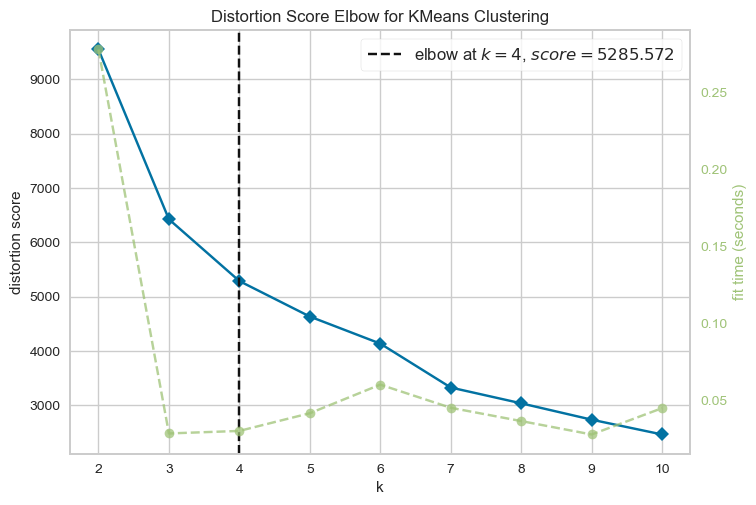

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_non_churned_data)
Elbow_M.show()

In [28]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_non_churned_data)
PCA_non_churned_data["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
non_churned_data["Clusters"]= yhat_AC

In [29]:
non_churned_data

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Distinct Called Numbers,Customer Value,Average of use,Clusters
0,8,0,38,0,5,17,197.640,1.025822,3
1,0,0,39,0,7,4,46.035,1.060000,3
2,10,0,37,0,359,24,1536.520,0.681389,2
3,10,0,38,0,1,35,240.020,1.060101,3
4,3,0,38,0,2,33,145.805,0.687644,3
...,...,...,...,...,...,...,...,...,...
2650,7,0,20,1,35,16,221.280,1.041667,1
2651,21,0,19,2,92,44,721.980,0.759297,0
2652,17,0,17,1,80,42,261.210,0.869774,0
2653,13,0,18,4,38,21,280.320,1.031699,0


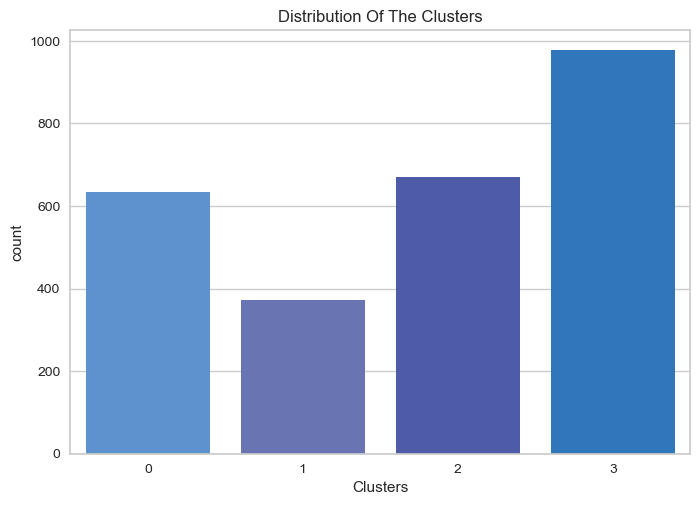

In [30]:
pal = ["#4A90E2", "#5C6BC0", "#3F51B5", "#1976D2"]

pl = sns.countplot(x=non_churned_data["Clusters"], palette=pal)

pl.set_title("Distribution Of The Clusters")

plt.show()

In [31]:
df = pd.DataFrame(non_churned_data)

cluster_summary = df.groupby('Clusters').agg({
    'Call  Failure': 'mean',
    'Complains': 'mean',
    'Subscription  Length': 'mean',
    'Charge  Amount': 'mean',
    'Frequency of SMS': 'mean',
    'Average of use': 'mean',
    'Distinct Called Numbers': 'mean',
    'Customer Value': 'mean'
    
})


cluster_summary

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Average of use,Distinct Called Numbers,Customer Value
Clusters,,,,,,,,
0,16.373228,0.064567,33.122835,2.647244,39.398425,1.080917,41.866142,457.995189
1,2.734584,0.000000,20.699732,0.479893,49.841823,1.482291,13.900804,305.667895
2,6.546269,0.000000,35.859701,1.049254,249.779104,1.158457,26.634328,1281.637231
3,4.630502,0.000000,34.737973,0.299898,11.993859,0.808007,18.737973,161.970338


**Summary:**
* Cluster 0: High-value customers with notable call issue --> Should focus on improving call quality to maintain their loyalty.
* Cluster 1: moderate-value customers with high SMS use --> This group should be a pariority as they are the longest subscription so, We  should do more to gain their loyalty.
* Cluster 2: High-value, highly engaged customers with very high SMS usage --> Can maintain loyalty with exclusive rewards on SMSs.
* Cluster 3: \moderate-value customers with low engagement --> target them with offers to boost usage and spending.